# AdaBoost

AdaBoost(Adaptive Boosting,自适应提升法)是当代boosting领域的开山鼻祖，它虽然不是首个实践boosting思想算法，却是首个成功将boosting思想发场光大的算法。它的主要贡献在于实现了两个变化：

1、首次实现根据之前弱评估器的结果自适应地影响后续建模过程

2、在Boosting算法中，首次实现考虑全部弱评估器结果的输出方式

作为开山算法，AdaBoost的构筑过程非常简单：首先，在全样本上建立一棵决策树，根据该决策树预测的结果和损失函数值，增加被预测错误的样本在数据集中的样本权重，并让加权后的数据集被用于训练下一棵决策树。这个过程相当于有意地加重“难以被分类正确的样本“的权重，同时降低容易被分类正确的样本的权重，而将后续要建立的弱评估器的注意力引导到难以被分类正确的样本上。

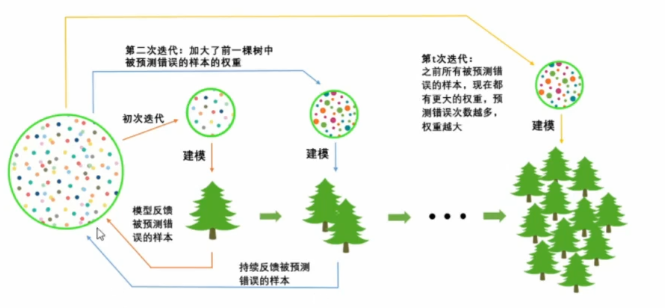

在该过程中，上一棵决策树的的结果通过影响样本权重、即影响数据分布来影响下一棵决策树的建立，整个过程是自适应的。当全部弱评估器都被建立后，集成尊法的输出H(x)等于所有弱评估器输出值饱加权平均，加权所用的权重也是在建树过程中被自适应地计算出来的。

需要注意的是，虽然最初的原理较为简单，但近年来AdaBoosti在已经发展出多个升级的版本（比如，在建立每棵树之前，允许随机抽样特征，这使得Boosting中的决策树行为更加接近Bagging中的决策树），而sklearn中使用了这些升级后的版本进行实现。幸运的是，这些实现并不影响我们对sklearn中的类的使用，对这些实现的具体过程感兴趣的小伙伴，可以在章节《2原理进阶：AdaBoost的求解流程》中查看具体原理。

在sklearn中，AdaBoost既可以实现分类也可以实现回归，我们使用如下两个类来调用它们：

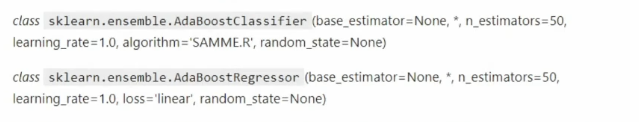

不难发现，AdaBoost的参数非常非常少，在调用AdaBoost时我们甚至无需理解AdaBoost的具体求解过程，同时，ADB分类器与ADB回归器的参数也高度一致。在课程当中，我们将重点Boosting算法独有的参数，以及ADB分类与ADB回归中表现不一致的参数。

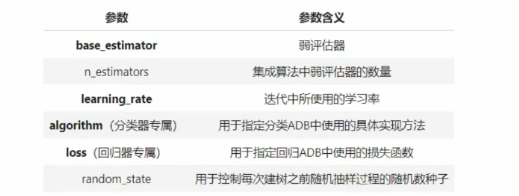

## 1 AdaBoost的基本参数和损失函数

In [1]:
from sklearn.ensemble import  AdaBoostClassifier as ABC
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.datasets import load_digits
import numpy as np

In [2]:
data_c = load_digits()
X_c = data_c.data
y_c = data_c.target
X_c.shape

(1797, 64)

In [3]:
np.unique(y_c)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* 参数base_estimator,属性base_estimator._与estimators._

base_estimator是规定AdaBoost中使用弱评估器的参数。与对弱评估器有严格要求的Bagging算法不同，boosting算法通过降低偏差来降低整体泛化误差，因此可以使用任意弱评估器，且这些弱评估器往往被假设成非常弱小的评估器。当然了，默认的弱评估器还是决策树。在sklea中，ADB分类器的默认弱评估器是最大深度为1的“树桩”，ADB回归器的默认评估器是最大深度为3的“树苗”，弱评估器本身基本不具备判断能力。而回归器中树深更深是因为boosting算法中回归任务往往更加复杂。在传统ADB理论当中，一般认为AdaBoost中的弱分类器为最大深度为1的树桩，但现在我们也可以自定义某种弱评估器来进行输入。

当模型建好之后，我们可以使用属性base_estimator来查看当前弱评估器，同时也可以使用estimators_.来查看当前集成模型中所有弱评估器的情况：

* 建立集成算法，调用其中的弱评估器

In [4]:
# 建立ADB回归和ADB分类模型
clf  = ABC(n_estimators=3).fit(X_c, y_c)
reg = ABR(n_estimators=3).fit(X_c, y_c)

In [5]:
clf.base_estimator_

e:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


DecisionTreeClassifier(max_depth=1)

In [6]:
clf.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=299677545),
 DecisionTreeClassifier(max_depth=1, random_state=1105266725),
 DecisionTreeClassifier(max_depth=1, random_state=1149852537)]

In [7]:
reg.base_estimator_

DecisionTreeRegressor(max_depth=3)

In [8]:
reg.estimators_

[DecisionTreeRegressor(max_depth=3, random_state=1512406232),
 DecisionTreeRegressor(max_depth=3, random_state=774409274),
 DecisionTreeRegressor(max_depth=3, random_state=967326677)]

当AdaBoost完成分类任务时，弱评估器是分类树，当AdaBoost完成回归任务时，弱评估器是回归树，这一点与之后的Boosting算法们有较大的区别。

* 参数learning_rate

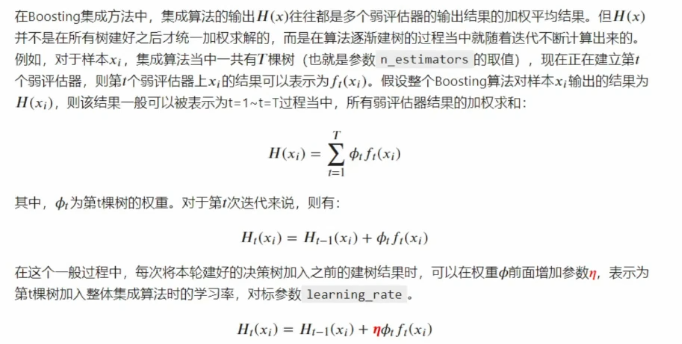

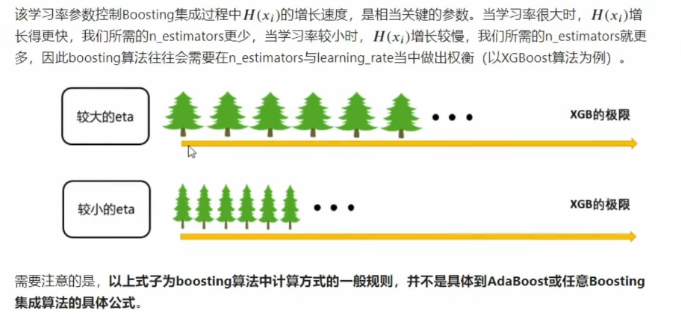

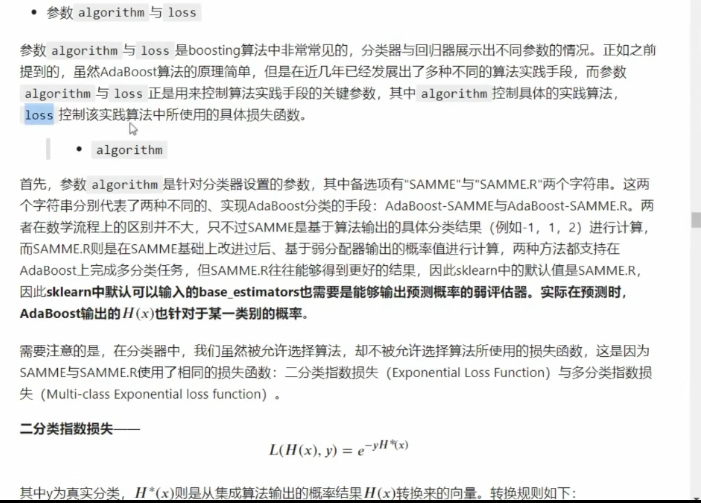

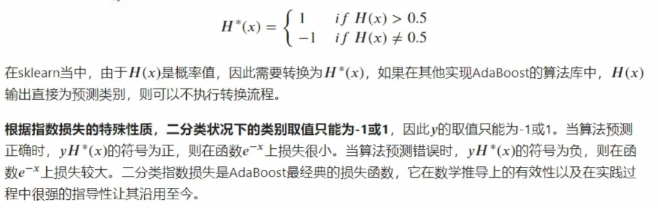

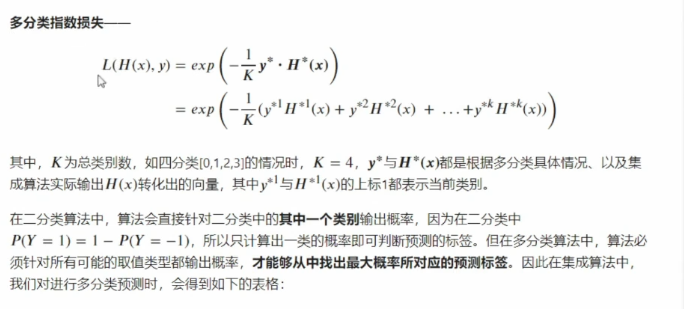

In [10]:
import pandas as pd

In [11]:
# 多分类预测
clf = DTC(max_depth=2).fit(X_c, y_c)

# 多分类预测输出概率结果，取前5个样本
pd.DataFrame(clf.predict_proba(X_c)[:5])

,0,1,2,3,4,5,6,7,8,9
0,0.909574,0.000000,0.010638,0.000000,0.031915,0.031915,0.015957,0.000000,0.000000,0.000000
1,0.003781,0.131380,0.120038,0.157845,0.134216,0.011342,0.003781,0.163516,0.158790,0.115312
2,0.003781,0.131380,0.120038,0.157845,0.134216,0.011342,0.003781,0.163516,0.158790,0.115312
3,0.000000,0.092672,0.099138,0.032328,0.071121,0.312500,0.370690,0.012931,0.006466,0.002155
4,0.909574,0.000000,0.010638,0.000000,0.031915,0.031915,0.015957,0.000000,0.000000,0.000000


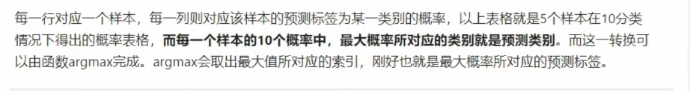

In [12]:
np.argmax(pd.DataFrame(clf.predict_proba(X_c)).iloc[0, :])

0

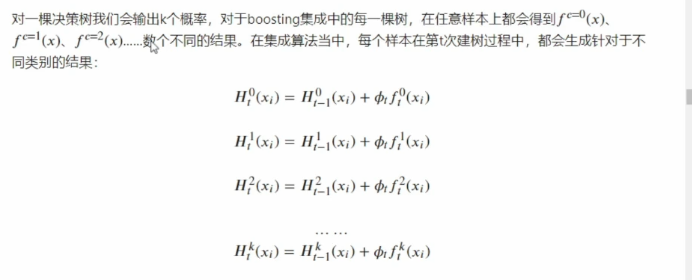

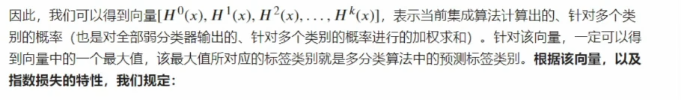

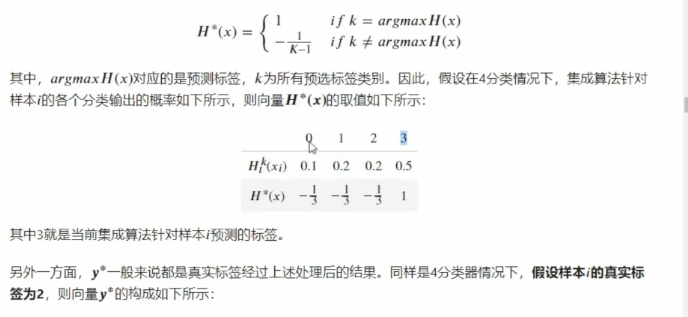

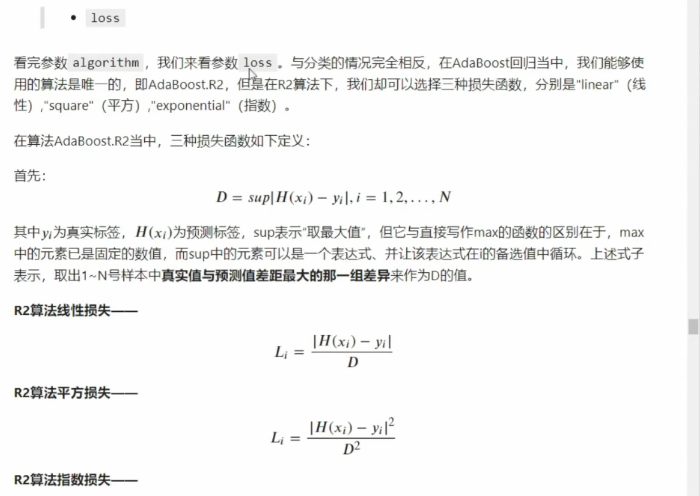

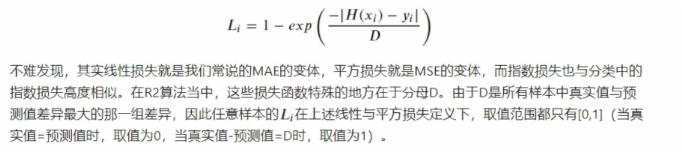

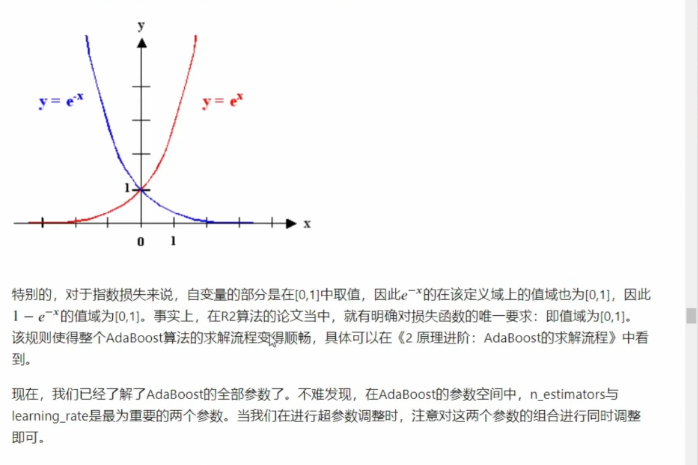

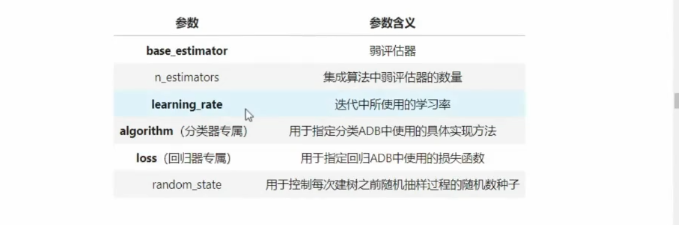